In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [2]:
import xgboost 

In [3]:
xgboost.__version__

'0.81'

In [54]:
## 유니코드 에러가 나서 xgboost 버전을 0.81로 처리

In [3]:
xgboost.__version__

'0.81'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [5]:
loan_data = pd.read_csv('loanData.csv', encoding='utf-8')

In [6]:
loan_data.isnull().sum()

id                        0
gender                   13
age                       0
married                   3
dependents               15
education                 0
self_employed            32
business_type             0
applicant_income          0
applicant_work_period     0
coapplicant_income        0
credit_history           50
credit_amount             0
property_area             0
property_type             0
credit_rate               0
loan_amount               0
loan_term                 0
loan_status               0
dtype: int64

In [7]:
loan_data.isnull().sum()

id                        0
gender                   13
age                       0
married                   3
dependents               15
education                 0
self_employed            32
business_type             0
applicant_income          0
applicant_work_period     0
coapplicant_income        0
credit_history           50
credit_amount             0
property_area             0
property_type             0
credit_rate               0
loan_amount               0
loan_term                 0
loan_status               0
dtype: int64

In [8]:
loan_data.dtypes

id                        object
gender                    object
age                        int64
married                   object
dependents                object
education                 object
self_employed             object
business_type              int64
applicant_income           int64
applicant_work_period      int64
coapplicant_income       float64
credit_history           float64
credit_amount              int64
property_area             object
property_type              int64
credit_rate                int64
loan_amount                int64
loan_term                  int64
loan_status                int64
dtype: object

In [9]:
loan_data[:3]

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,Male,55,Yes,3+,Not Graduate,No,88,4755,51,0.0,0.0,0,Semiurban,3,8,2090,0,0
1,LA001864,Male,68,Yes,3+,Not Graduate,No,14,4931,47,0.0,NaN,0,Semiurban,3,7,5376,24,0
2,LA002536,Male,43,Yes,3+,Not Graduate,No,56,3095,33,0.0,1.0,1382,Rural,3,5,3390,33,1


In [10]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
loan_data['married'].unique()

array(['Yes', 'No', nan], dtype=object)

In [12]:
loan_data['dependents'].unique()

array(['3+', '2', '1', '0', nan], dtype=object)

In [13]:
loan_data['education'].unique()

array(['Not Graduate', 'Graduate'], dtype=object)

In [14]:
loan_data['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
loan_data['business_type'].unique()

array([88, 14, 56, 46, 60, 80, 21, 66, 30, 64, 42, 94,  4, 45, 26, 76, 74,
       35, 43, 59, 11, 29, 61, 78, 51, 81, 58, 10, 37, 16, 49, 55, 96, 36,
       83, 68, 70, 63, 13, 65, 86, 85, 40, 73, 41, 31, 24, 93, 27, 15, 97,
       82, 47,  3, 87, 53, 91, 48, 71, 84, 89, 33, 67, 57, 52, 90,  5,  1,
        2, 28, 77, 79, 92, 72, 99, 17, 44, 69, 95, 38, 20, 54, 34,  9,  8,
       50, 18,  6, 19, 62, 23, 32, 75, 98, 12, 22, 25,  7])

In [16]:
loan_data['credit_history'].unique()

array([ 0., nan,  1.])

In [17]:
loan_data['property_area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

## Mark Data & normalize

In [18]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [19]:
gendr_mapping = {'Male': 1, 'Female': 0, np.nan: -1}

In [20]:
loan_data['married'].unique()

array(['Yes', 'No', nan], dtype=object)

In [21]:
married_mapping = {'No': 0, 'Yes': 1, np.nan: -1}

In [22]:
loan_data['dependents'].unique()

array(['3+', '2', '1', '0', nan], dtype=object)

In [23]:
dep_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3, np.nan: -1}

In [24]:
loan_data['education'].unique()

array(['Not Graduate', 'Graduate'], dtype=object)

In [25]:
edu_mappiong = {'Graduate': 1, 'Not Graduate': 0}

In [26]:
loan_data['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
emp_mapping = {'No': 0, 'Yes': 1, np.nan: -1}

In [28]:
loan_data['property_area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

In [29]:
prop_mapping = {'Urban': 1, 'Rural': 3, 'Semiurban': 2}

In [30]:
loan_data = loan_data.replace({'gender': gendr_mapping,
                               'married': married_mapping,
                               'dependents': dep_mapping,
                               'education': edu_mappiong,
                               'self_employed': emp_mapping,
                               'property_area': prop_mapping
                              })

In [31]:
loan_data[:3]

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,1,55,1,3,0,0,88,4755,51,0.0,0.0,0,2,3,8,2090,0,0
1,LA001864,1,68,1,3,0,0,14,4931,47,0.0,NaN,0,2,3,7,5376,24,0
2,LA002536,1,43,1,3,0,0,56,3095,33,0.0,1.0,1382,3,3,5,3390,33,1


# Train Test Split

In [32]:
# id 제외
X = loan_data.loc[:, 'gender':'loan_term']

In [33]:
y = loan_data.loc[:, 'loan_status']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train Model

In [35]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier()

In [36]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

In [37]:
calculate_accuracy(model, x_test, y_test)

Accuracy: 84.55%


0.8455284552845529

# Improving Models

In [38]:
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.04,
    n_estimators=50,
    reg_alpha =0.45,
    reg_lambda=0.6
)
model.fit(x_train, y_train)

print(model.evals_result)
calculate_accuracy(model, x_test, y_test)

<bound method XGBClassifier.evals_result of XGBClassifier(learning_rate=0.04, n_estimators=50, reg_alpha=0.45,
              reg_lambda=0.6)>
Accuracy: 85.37%


0.8536585365853658

# show XAI

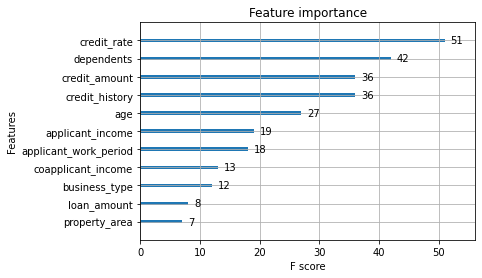

In [39]:
import xgboost
xgboost.plot_importance(model)

In [40]:
import shap

In [41]:
shap.__version__

'0.35.0'

In [42]:
x_train.iloc[1, :]

gender                       1.0
age                         39.0
married                      1.0
dependents                   2.0
education                    1.0
self_employed                0.0
business_type               91.0
applicant_income         16666.0
applicant_work_period       39.0
coapplicant_income           0.0
credit_history               1.0
credit_amount             3571.0
property_area                1.0
property_type                1.0
credit_rate                  4.0
loan_amount              11550.0
loan_term                   30.0
Name: 105, dtype: float64

In [43]:
idx = 13

In [44]:
model.save_model('x_model')

In [45]:
%ls

Loan Data.ipynb* loanData.csv*    x_model


In [46]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                x_train.iloc[idx,:])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [47]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, x_train)

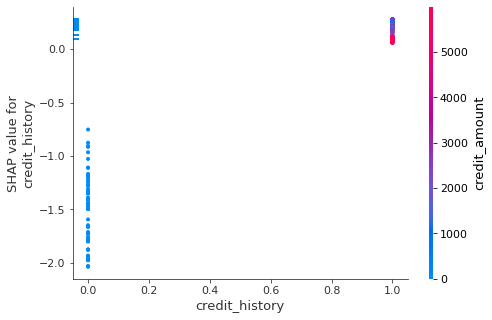

In [48]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("credit_history", shap_values, x_train)

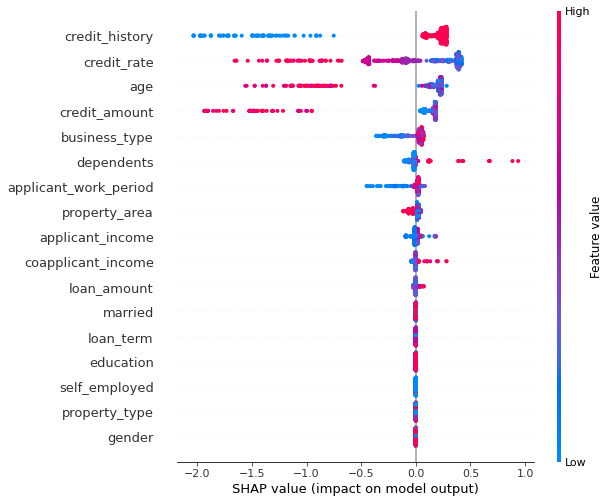

In [49]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train)

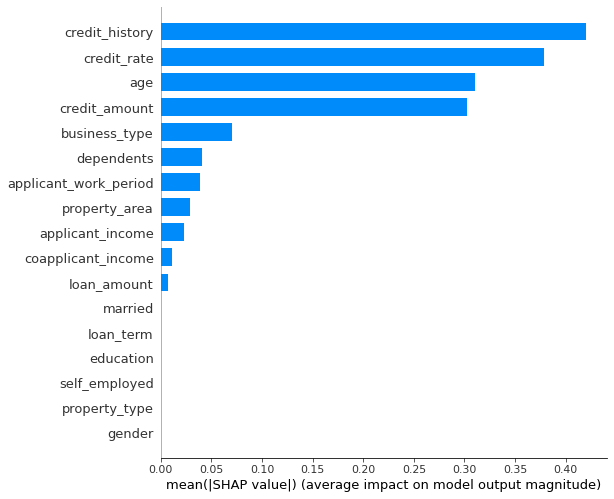

In [50]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

# plot Tree

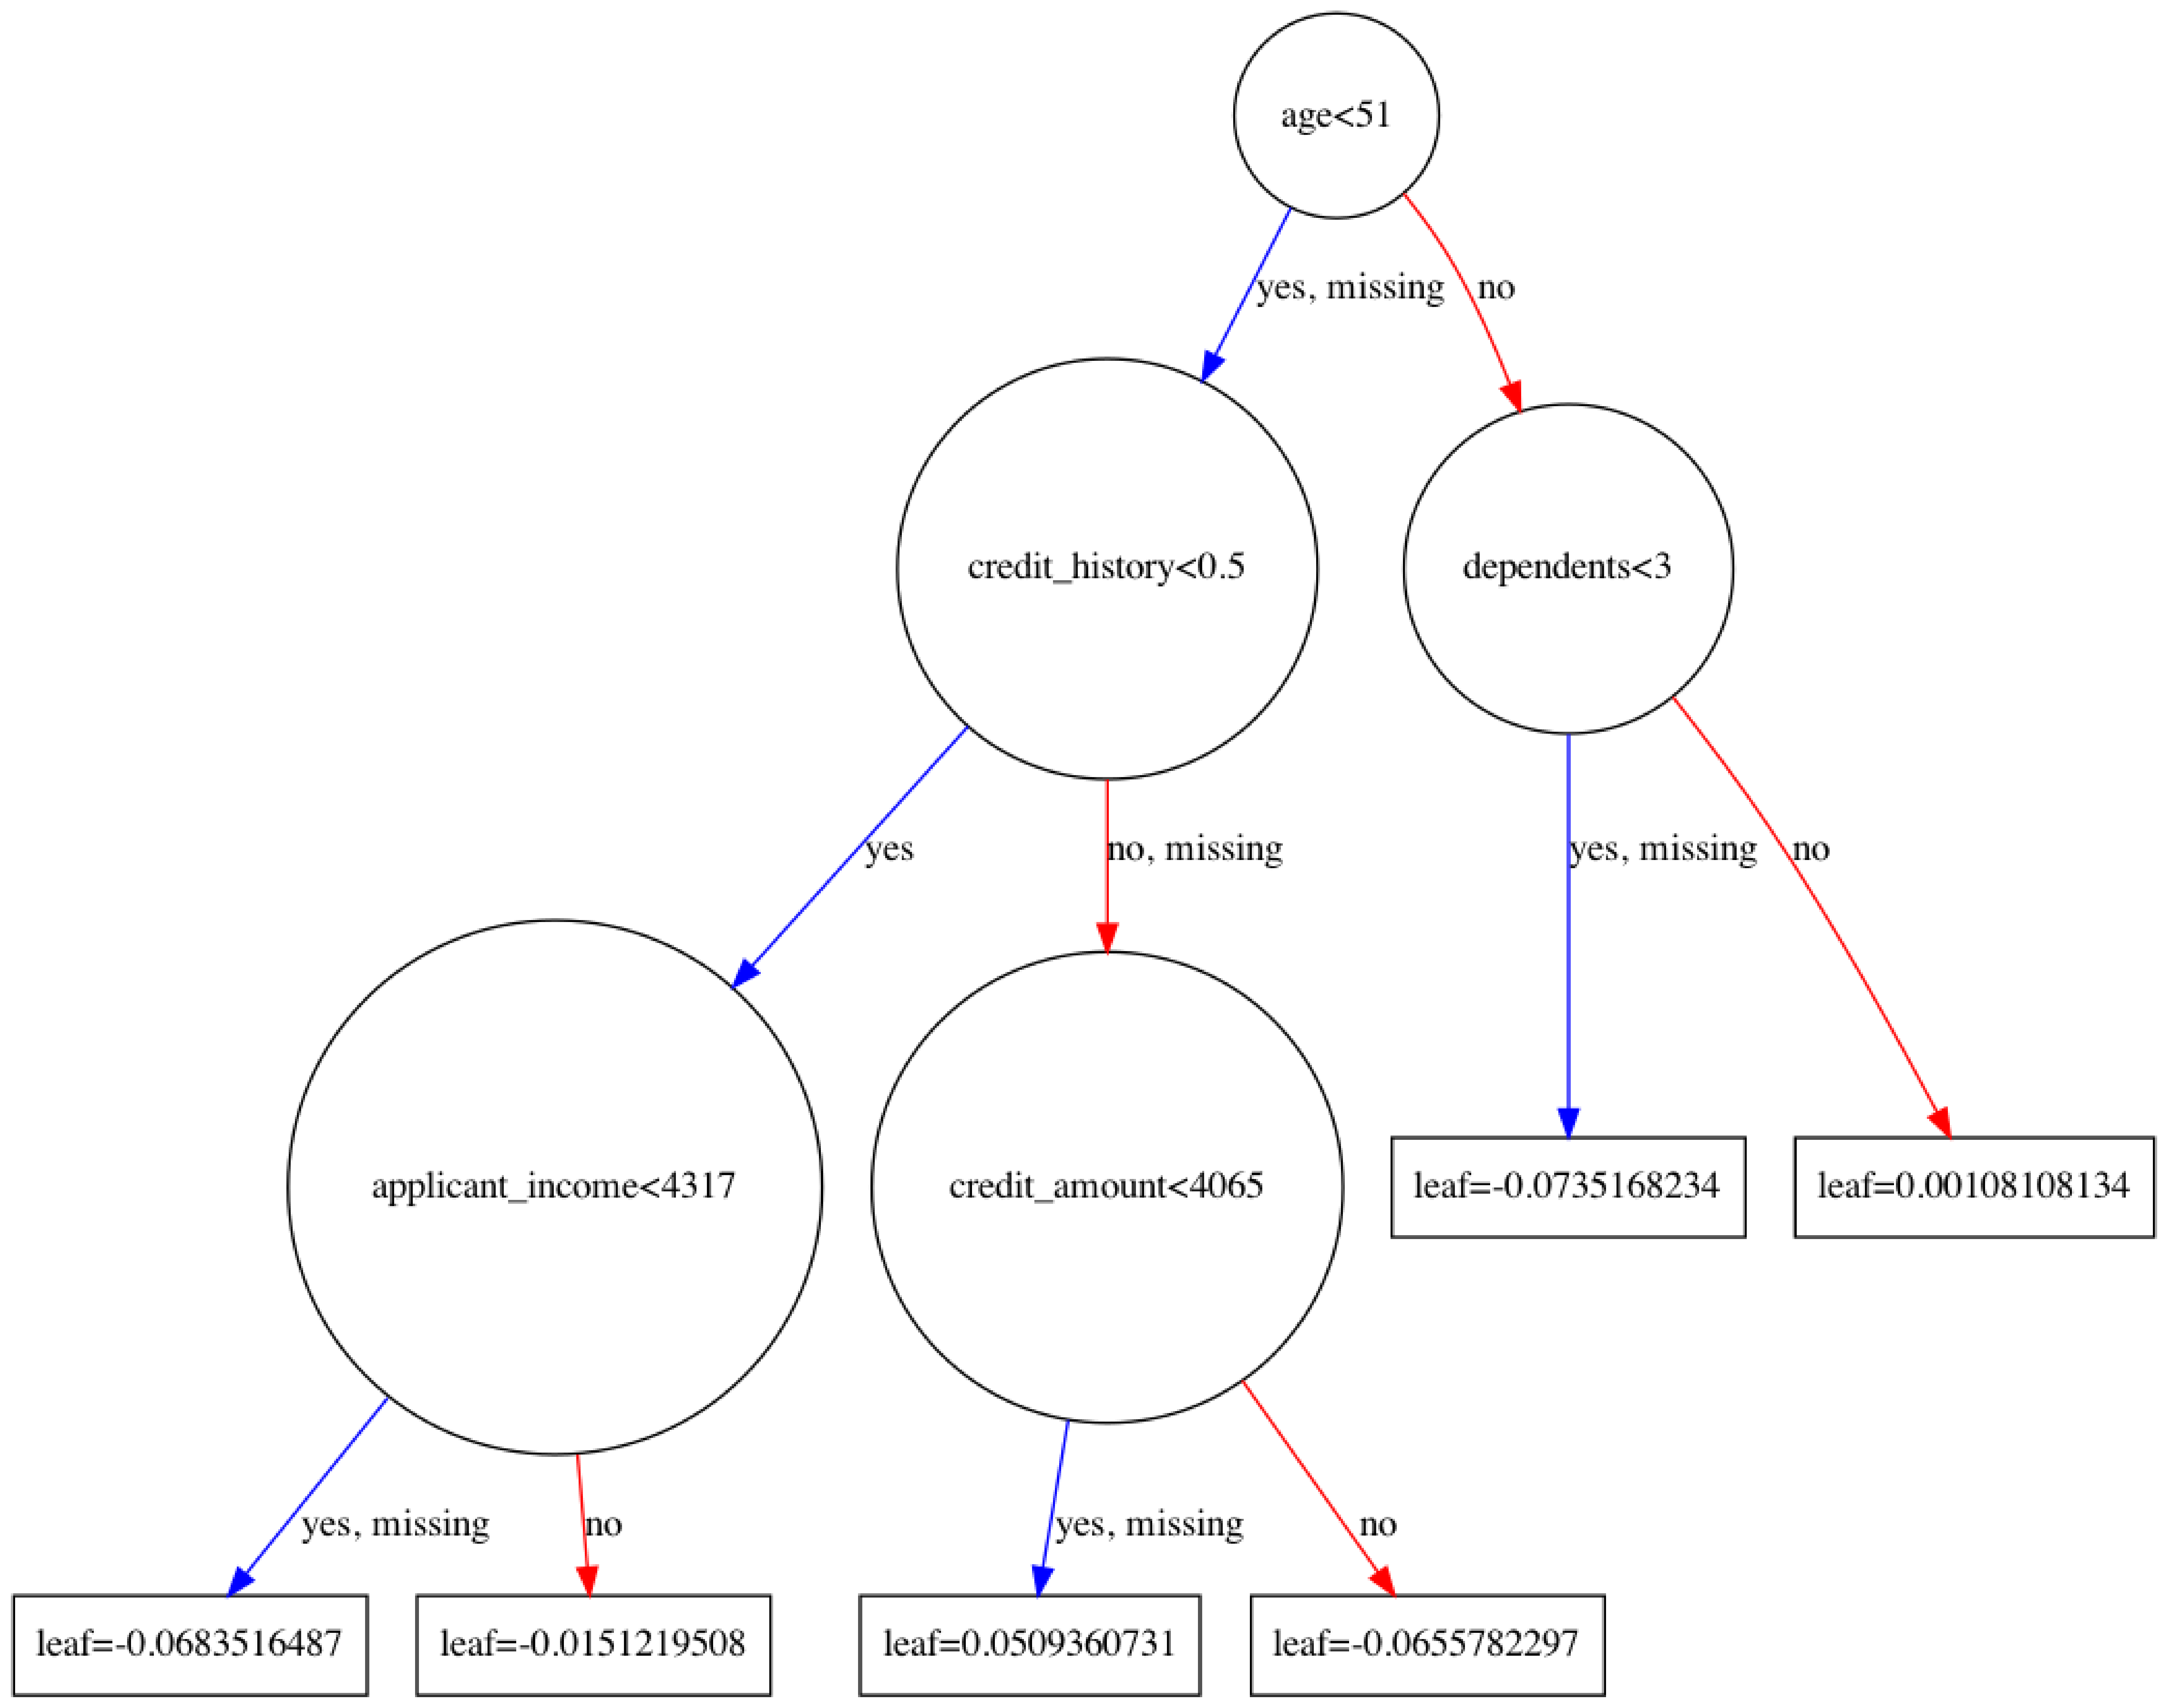

In [51]:
%matplotlib inline
##import os
##os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt

from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 100,200

plot_tree(model)
plt.show()

# Leaf value

https://stackoverflow.com/questions/40926340/what-does-the-value-of-leaf-in-the-following-xgboost-model-tree-diagram-means

For a classification tree with 2 classes {0,1}, the value of the leaf node represent the raw score for class 1. It can be converted to a probability score by using the logistic function. The calculation below use the left most leaf as an example.

1/(1+np.exp(-1*0.167528))=0.5417843204057448
What this means is if a data point ends up being distributed to this leaf, the probability of this data point being class 1 is 0.5417843204057448.

In [52]:
def print_prob(leaf_value):
    result = 1/(1+np.exp(-1*leaf_value))
    print('{:.2%}'.format(result))
    return result

In [53]:
print_prob(-0.064385)

48.39%


0.48390930818332867